In [132]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [133]:
data = load_breast_cancer()

In [134]:
X = data.data[:,[0,1]]
y = data.target


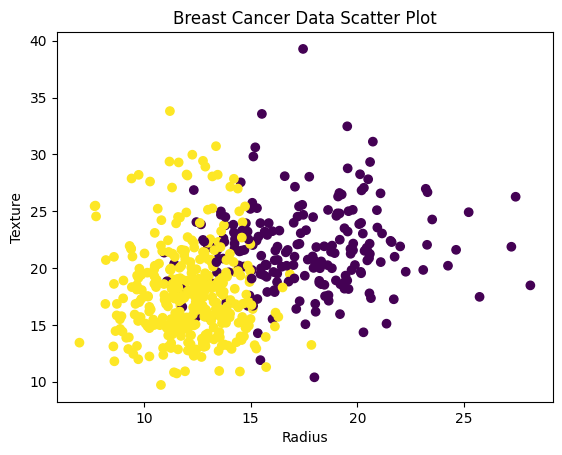

In [135]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

plt.xlabel('Radius')
plt.ylabel('Texture')
plt.title('Breast Cancer Data Scatter Plot')

plt.show()

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [137]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [139]:
from torch import nn


In [140]:
class LinearReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [141]:
torch.manual_seed(42)

model = LinearReg()

In [142]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

epochs = 150
epoch_count = []
loss_values = []
test_loss_values = []
accuracy_values =[]

In [143]:
for epoch in range(epochs):
  model.train()

  optimizer.zero_grad()

  y_pred = model(X_train)

  loss = loss_fn(y_pred, y_train.view(-1,1))

  loss.backward()
  loss_values.append(loss.detach().numpy())
  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, y_test.view(-1,1))
    test_loss_values.append(test_loss)
    epoch_count.append(epoch)

  with torch.no_grad():
    predicted = y_pred.round()
    correct = (predicted == y_train.view(-1,1)).float().sum()
    accuracy = correct/y_train.size(0)
    accuracy_values.append(accuracy)

  if epoch % 10 ==0 :
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} | Accuracy: {accuracy}")

Epoch: 0 | Loss: 0.6169030070304871 | Test Loss: 0.5799070596694946 | Accuracy: 0.7736263871192932
Epoch: 10 | Loss: 0.4474402070045471 | Test Loss: 0.40745219588279724 | Accuracy: 0.8813186883926392
Epoch: 20 | Loss: 0.375930517911911 | Test Loss: 0.32147452235221863 | Accuracy: 0.8901098966598511
Epoch: 30 | Loss: 0.3320319354534149 | Test Loss: 0.2648838758468628 | Accuracy: 0.8879120945930481
Epoch: 40 | Loss: 0.3084353804588318 | Test Loss: 0.2320001721382141 | Accuracy: 0.8835164904594421
Epoch: 50 | Loss: 0.2944236695766449 | Test Loss: 0.2138657122850418 | Accuracy: 0.8813186883926392
Epoch: 60 | Loss: 0.2842937111854553 | Test Loss: 0.20607861876487732 | Accuracy: 0.8813186883926392
Epoch: 70 | Loss: 0.2766326367855072 | Test Loss: 0.1976451724767685 | Accuracy: 0.8857142925262451
Epoch: 80 | Loss: 0.2713732421398163 | Test Loss: 0.18954670429229736 | Accuracy: 0.892307698726654
Epoch: 90 | Loss: 0.26756250858306885 | Test Loss: 0.1847248077392578 | Accuracy: 0.89670330286026


In [144]:
model.eval()
with torch.no_grad():
  y_pred = model(X_test)
  predicted = y_pred.round()
  correct = (predicted == y_test.view(-1,1)).float().sum()
  accuracy = correct/y_test.size(0)
  print(f"Accuracy on test data: {accuracy.item() * 100:.2f}%")

Accuracy on test data: 94.74%


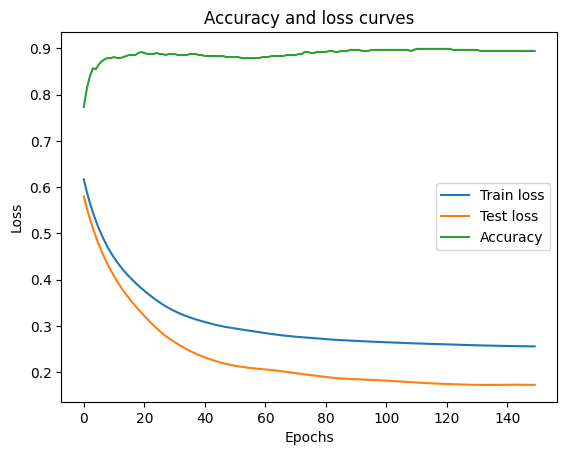

In [145]:
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.plot(epoch_count, accuracy_values, label="Accuracy")
plt.title("Accuracy and loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()